            Withdrawl_Amount
Date                        
2015-01-01              0.00
2015-02-01        5500056.18
2015-03-01        2200000.00
2015-04-01              0.00
2015-05-01        3231000.00


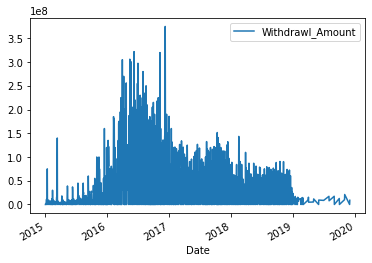

In [30]:
import pandas as pd
import matplotlib.pyplot as pyplot
#series = pd.read_csv(r'time_series_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
df1 = pd.read_csv('time_series_data.csv',parse_dates=[0], index_col=0, )
print(df1.head())
df1.plot()
pyplot.show()

In [31]:
df1

,Withdrawl_Amount
Date,
2015-01-01,0.00
2015-02-01,5500056.18
2015-03-01,2200000.00
2015-04-01,0.00
2015-05-01,3231000.00
...,...
2019-01-03,4532396.00
2019-02-03,12633316.00
2019-03-03,0.00


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1525 entries, 2015-01-01 to 2019-05-03
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Withdrawl_Amount  1525 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [33]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

In [34]:
scaled

array([[0.        ],
       [0.01466682],
       [0.00586667],
       ...,
       [0.        ],
       [0.0128    ],
       [0.0311859 ]])

In [35]:
#Means Scaling has worked
import numpy as np
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [36]:
len(scaled)

1525

In [37]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1067
test: 458


In [38]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
look_back = 25
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1041, 25)
(1041,)
(432, 25)
(432,)


In [83]:
# LSTM demands the formatting of the data in (Sample, #Features, Window_Size)
 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)
print('Hie',X_train[0])
print('hello',X_train[1])
print('hello2',X_train[2])

(1041, 25, 1)
(432, 25, 1)
Hie [[0.        ]
 [0.01466682]
 [0.00586667]
 [0.        ]
 [0.008616  ]
 [0.01034682]
 [0.00973333]
 [0.0092    ]
 [0.01213333]
 [0.010404  ]
 [0.        ]
 [0.0176    ]
 [0.01853333]
 [0.01733333]
 [0.01696   ]
 [0.01520267]
 [0.010708  ]
 [0.        ]
 [0.0176    ]
 [0.02461333]
 [0.01365333]
 [0.01061467]
 [0.00686667]
 [0.004     ]
 [0.        ]]
hello [[0.01466682]
 [0.00586667]
 [0.        ]
 [0.008616  ]
 [0.01034682]
 [0.00973333]
 [0.0092    ]
 [0.01213333]
 [0.010404  ]
 [0.        ]
 [0.0176    ]
 [0.01853333]
 [0.01733333]
 [0.01696   ]
 [0.01520267]
 [0.010708  ]
 [0.        ]
 [0.0176    ]
 [0.02461333]
 [0.01365333]
 [0.01061467]
 [0.00686667]
 [0.004     ]
 [0.        ]
 [0.        ]]
hello2 [[0.00586667]
 [0.        ]
 [0.008616  ]
 [0.01034682]
 [0.00973333]
 [0.0092    ]
 [0.01213333]
 [0.010404  ]
 [0.        ]
 [0.0176    ]
 [0.01853333]
 [0.01733333]
 [0.01696   ]
 [0.01520267]
 [0.010708  ]
 [0.        ]
 [0.0176    ]
 [0.02461333]
 [

In [41]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

In [57]:
!pip install tensorflow


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [59]:
import tensorflow as tf
batch_size = 1 #How many records we are pushing into the model
model = tf.keras.Sequential() #Defining Sequential Model

In [74]:
model=ARIMA(X_train[0],order=(2,1,0))

In [75]:
model_fit = model.fit(disp=0)

In [76]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   24
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  85.167
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 28 Oct 2020   AIC                           -162.334
Time:                        01:37:14   BIC                           -157.622
Sample:                             1   HQIC                          -161.084
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.518e-05      0.001     -0.078      0.937      -0.002       0.002
ar.L1.D.y     -0.2845      0.193     -1.470      0.141      -0.664       0.095
ar.L2.D.y     -0.4612      0.188     -2.454      0.0

In [84]:
model=ARIMA(X_test[0],order=(2,1,0))

In [85]:
model_fit = model.fit(disp=0)

In [86]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   24
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  15.706
Method:                       css-mle   S.D. of innovations              0.125
Date:                Wed, 28 Oct 2020   AIC                            -23.412
Time:                        01:39:53   BIC                            -18.700
Sample:                             1   HQIC                           -22.162
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.018      0.245      0.807      -0.030       0.039
ar.L1.D.y     -0.2655      0.212     -1.252      0.211      -0.681       0.150
ar.L2.D.y     -0.2196      0.220     -0.996      0.3